In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [ ]:
import io
data= pd.read_csv(io.BytesIO(uploaded['pima-indians-diabetes.csv']))
data

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


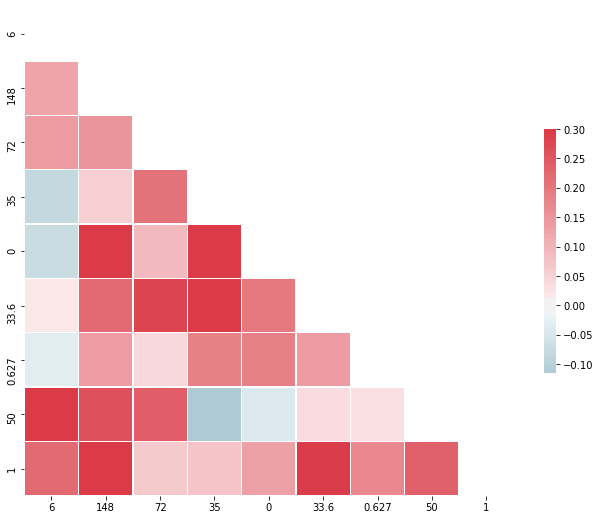

In [ ]:
corr=data.corr()

mask=np.triu(np.ones_like(corr,dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
y = data.iloc[:,8]
print(y)
#y=y.values.flatten()
x = data.iloc[:,[0,1,2,3,4,5,6,7]]
print(x)

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: 1, Length: 767, dtype: int64
      6  148  72  35    0  33.6  0.627  50
0     1   85  66  29    0  26.6  0.351  31
1     8  183  64   0    0  23.3  0.672  32
2     1   89  66  23   94  28.1  0.167  21
3     0  137  40  35  168  43.1  2.288  33
4     5  116  74   0    0  25.6  0.201  30
..   ..  ...  ..  ..  ...   ...    ...  ..
762  10  101  76  48  180  32.9  0.171  63
763   2  122  70  27    0  36.8  0.340  27
764   5  121  72  23  112  26.2  0.245  30
765   1  126  60   0    0  30.1  0.349  47
766   1   93  70  31    0  30.4  0.315  23

[767 rows x 8 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,shuffle=True, test_size=0.1)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))

model.add(Dense(29, activation='relu'))
model.add(Dense(58, activation='relu'))
model.add(Dense(116, activation='relu'))
model.add(Dense(51, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 15)                135       
_________________________________________________________________
dense_155 (Dense)            (None, 29)                464       
_________________________________________________________________
dense_156 (Dense)            (None, 58)                1740      
_________________________________________________________________
dense_157 (Dense)            (None, 116)               6844      
_________________________________________________________________
dense_158 (Dense)            (None, 51)                5967      
_________________________________________________________________
dense_159 (Dense)            (None, 1)                 52        
Total params: 15,202
Trainable params: 15,202
Non-trainable params: 0
_________________________________________________

In [ ]:

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, batch_size=1)

Train on 690 samples, validate on 77 samples
Epoch 1/250
690/690 [==============================] - 1s 2ms/step - loss: 0.9273 - accuracy: 0.5971 - val_loss: 0.6436 - val_accuracy: 0.6623
Epoch 2/250
690/690 [==============================] - 1s 1ms/step - loss: 0.6653 - accuracy: 0.6362 - val_loss: 0.5806 - val_accuracy: 0.6753
Epoch 3/250
690/690 [==============================] - 1s 1ms/step - loss: 0.6396 - accuracy: 0.6623 - val_loss: 0.5569 - val_accuracy: 0.7792
Epoch 4/250
690/690 [==============================] - 1s 1ms/step - loss: 0.6232 - accuracy: 0.6594 - val_loss: 0.5953 - val_accuracy: 0.7013
Epoch 5/250
690/690 [==============================] - 1s 1ms/step - loss: 0.6143 - accuracy: 0.6739 - val_loss: 0.5720 - val_accuracy: 0.7273
Epoch 6/250
690/690 [==============================] - 1s 1ms/step - loss: 0.5968 - accuracy: 0.6710 - val_loss: 0.5801 - val_accuracy: 0.7273
Epoch 7/250
690/690 [==============================] - 1s 1ms/step - loss: 0.6068 - accuracy: 0.6

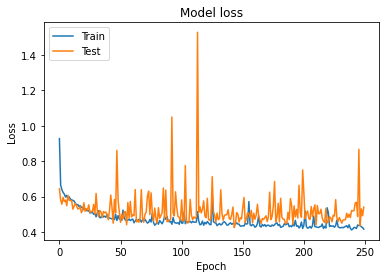

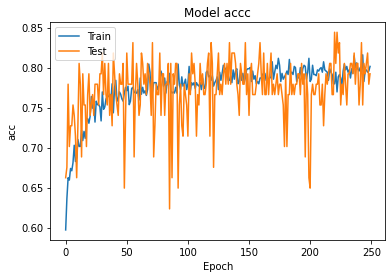

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()